# Business Case: GoBikes - Hypothesis Testing

GoBikes is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

GoBikes zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

GoBikes has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# How you can help here?

The company wants to know:

1 . Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

2 . How well those variables describe the electric cycle demands?

# Concept Used:

. Bi-Variate Analysis

. 2-sample t-test: testing for difference across populations

. ANNOVA

. Chi-square

# Lets import the required libraries for analysis 

In [1]:
import numpy as np         #For numerical calculations 
import pandas as pd        #For dataframe 
import seaborn as sns      #For advance visualization 
import matplotlib.pyplot as plt  #For visualization 
import scipy.stats as sts   #For statistical calculations 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("GoBike_sharing.txt")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Lets do the basic data exploration 

In [3]:
df.shape                                         ## It is seen that our dataset have 10 thousand rows and 12 columns 

(10886, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Since, datetime column is given as an object data type and its significant to covert into datetime for further analysis. 

In [5]:
df["datetime"] = pd.to_datetime(df["datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


It is now converted into datetime datatype.

Lets split the datetime into date , year , month , dayofweek, so that we can do deep analysis. 

In [6]:
df["Year"] = df["datetime"].dt.year
df["Month"] = df["datetime"].dt.month
df["Day"] = df["datetime"].dt.day
df["Hour"] = df["datetime"].dt.hour
df["DayofWeek"] = df["datetime"].dt.dayofweek

# Its time to check if our dataset contains any null or nan values.

In [7]:
df.isna().sum()/100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
Year          0.0
Month         0.0
Day           0.0
Hour          0.0
DayofWeek     0.0
dtype: float64

In [8]:
df.isnull().sum()/100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
Year          0.0
Month         0.0
Day           0.0
Hour          0.0
DayofWeek     0.0
dtype: float64

It is observed from the above that our dataset do not contain any nan or null values. 

In [9]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
Year              2
Month            12
Day              19
Hour             24
DayofWeek         7
dtype: int64

In [10]:
[df.value_counts ()]

[datetime             season  holiday  workingday  weather  temp   atemp   humidity  windspeed  casual  registered  count  Year  Month  Day  Hour  DayofWeek
 2012-12-19 23:00:00  4       0        1           1        13.12  16.665  66        8.9981     4       84          88     2012  12     19   23    2            1
 2011-09-01 23:00:00  3       0        1           1        26.24  30.305  65        16.9979    15      111         126    2011  9      1    23    3            1
 2011-09-02 07:00:00  3       0        1           1        24.60  28.030  83        7.0015     6       253         259    2011  9      2    7     4            1
 2011-09-02 06:00:00  3       0        1           1        24.60  28.030  83        8.9981     3       73          76     2011  9      2    6     4            1
 2011-09-02 05:00:00  3       0        1           2        24.60  28.030  83        8.9981     0       20          20     2011  9      2    5     4            1
                                 

We have seen the structure , shape , null or nan and unique values of data. Now we will see the statistical values of data

In [11]:
df.describe(include = "all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour,DayofWeek
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-06-09 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,3.013963
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,2.004585
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,1.000000


# Observations 

1 . The demand of GoBikes are less in winter season and more in spring season. 

2 . The need of bikes mostly on working days as campared to holiday.

3 . It is obvious that the average demand of yulu bikes are closely in clear weather. However, it is also observed that there is few needs of bikes in heavy rain as well.

4 . The averge demand of bikes at 20.23 degree celcius temperature and 23.65 degree celcius feeling temperature. 

5 . It is observed that bikes are in demanding at 62 Gram per cubic meter humidity rate. 

6 . The general demand of bikes are more at 12.8 Meters per second windspeed. However, it is still less than the average windspeed of indian weather. 

7 . The total average registration count of Gobikes are 192. 

# Univariate Analysis

In [12]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour,DayofWeek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


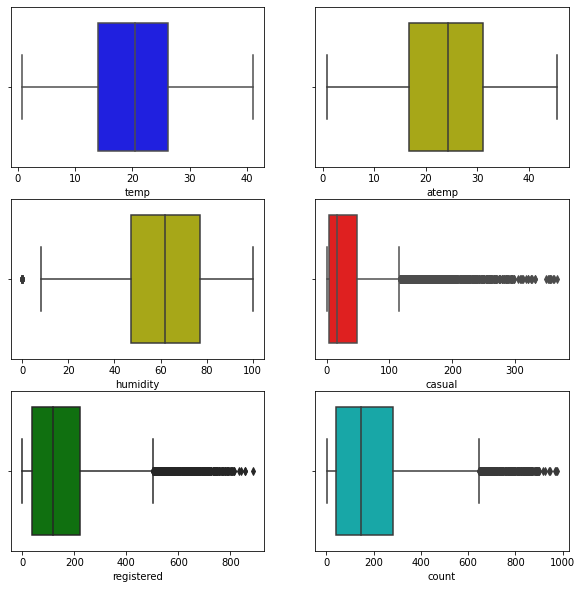

In [13]:
fig, axis = plt.subplots(nrows = 3 , ncols = 2 , figsize = (10,10))
sns.boxplot(data = df , x = "temp" , color= "b" , ax = axis[0,0])
sns.boxplot(data = df , x = "atemp" , color= "y" , ax = axis[0,1])
sns.boxplot(data = df , x = "humidity" , color= "y" , ax = axis[1,0])
sns.boxplot(data = df , x = "casual" , color= "r" , ax = axis[1,1])
sns.boxplot(data = df , x = "registered" , color= "g" , ax = axis[2,0])
sns.boxplot(data = df , x = "count" , color= "c" , ax = axis[2 , 1])



plt.show()

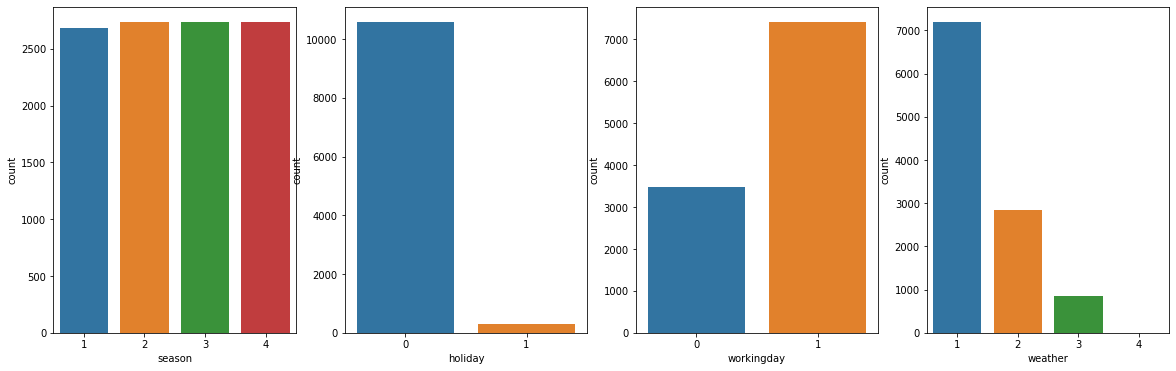

In [14]:
fig,axis = plt.subplots(nrows = 1, ncols = 4, figsize = (20,6))
sns.countplot(data =df , x = "season" , ax = axis[0])
sns.countplot(data =df , x = "holiday" , ax = axis[1])
sns.countplot(data =df , x = "workingday" , ax = axis[2])
sns.countplot(data =df , x = "weather" , ax = axis[3])
plt.show()

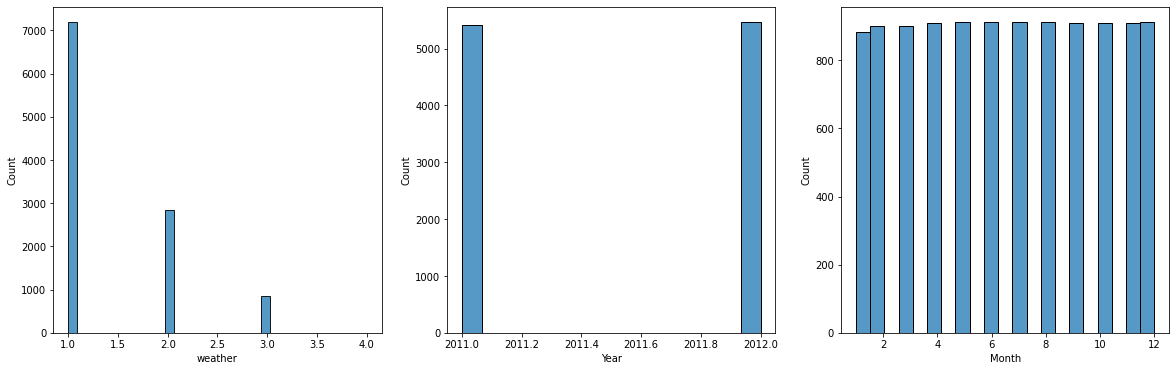

In [15]:
fig,axis = plt.subplots(nrows = 1, ncols = 3, figsize = (20,6))
sns.histplot(data =df , x = "weather" , ax = axis[0])
sns.histplot(data =df , x = "Year" , ax = axis[1])
sns.histplot(data =df , x = "Month" , ax = axis[2])
plt.show()

# Observations

1 . Casual registration has the highest count of outliers as campared to the count of registered users. 

2 . There are no outliers have been found in temperature and atemperature column and the median temperature is in between 20-25 degree celcius.

3 . Almost there is equal demand of bikes in all the seasons. 

4 . The need of GoBikes mostly on working days as campared to holiday.

5 . It is obvious that the average demand of GoBikes are closely in Clear, Few clouds, partly cloudy, partly cloudy weather. However, it is also observed that there is few needs of bikes in heavy rain.

6 . It is observed that the demand of GoBikes are almost same in the year of 2011 and 2012.

7 . Same demand has been observed in the same months. 


# Bivariate Analysis 

In [16]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour,DayofWeek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


Now lets see the effect of variables on total count of casual and registered Yulu bikes. 

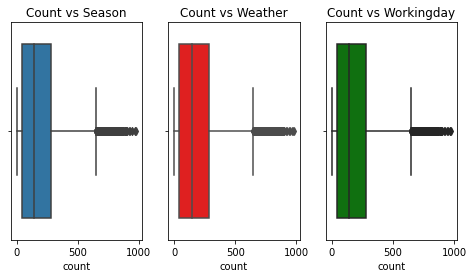

In [17]:
fig,axis = plt.subplots(nrows = 1 , ncols = 3, figsize = (8,4))
sns.boxplot(data = df , x = "count" , hue = "season"  , ax = axis[0]).set_title("Count vs Season")
sns.boxplot(data = df , x = "count" , hue = "weather" , ax = axis[1] , color = "r").set_title("Count vs Weather")
sns.boxplot(data = df , x = "count" , hue = "workingday" , ax = axis[2] , color = "g").set_title("Count vs Workingday")
plt.show()

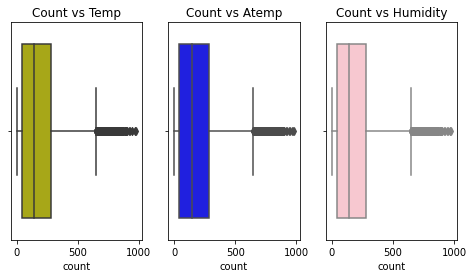

In [18]:
fig,axis = plt.subplots(nrows = 1 , ncols = 3, figsize = (8,4))
sns.boxplot(data = df , x = "count" , hue = "temp" , ax = axis[0] , color = "y").set_title("Count vs Temp")
sns.boxplot(data = df , x = "count" , hue = "atemp" , ax = axis[1] , color = "b").set_title("Count vs Atemp")
sns.boxplot(data = df , x = "count" , hue = "humidity" , ax = axis[2] , color = "pink").set_title("Count vs Humidity")
plt.show()

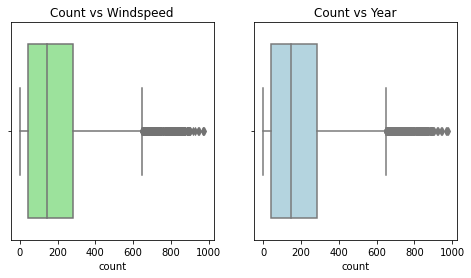

In [19]:
fig,axis = plt.subplots(nrows = 1 , ncols = 2, figsize = (8,4))
sns.boxplot(data = df , x = "count" , hue = "windspeed" , ax = axis[0] , color = "lightgreen").set_title("Count vs Windspeed")
sns.boxplot(data = df , x = "count" , hue = "Year" , ax = axis[1] , color = "lightblue").set_title("Count vs Year")
plt.show()

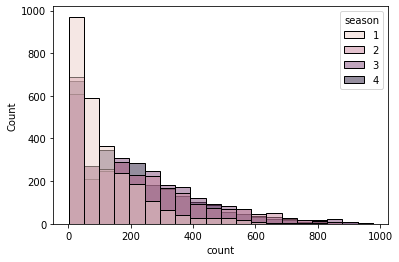

In [20]:
sns.histplot(data = df , x = "count" , hue = "season" , bins = 20)
plt.show()

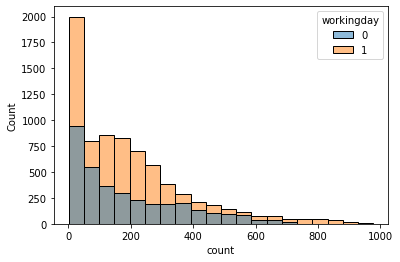

In [21]:
sns.histplot(data = df , x = "count" , hue = "workingday" , bins = 20)
plt.show()

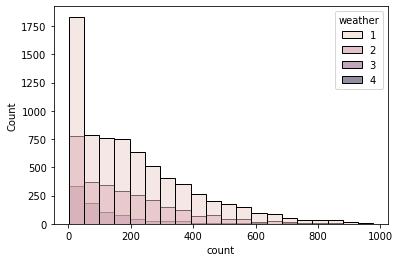

In [22]:
sns.histplot(data = df , x = "count" , hue = "weather" , bins = 20)
plt.show()

# Observations

1 . Count vs Season, people are ofter buy yulu bikes in spring season as compared to other seasons it means demand is very high in springs. 

2 . Count vs Workingday, there is very high demand of bikes in working days.

3 . Count vs Weather, weather plays an import role in the demand of bikes and demand is very high in rainy season.

4 . We can say from the above that tempearture and humidity have same number of outliers in both the cases maximum is lying between 500 to 600. 

5 . The median count of windspeed and year is somewhat lie between 0 - 100. 

# Hypothesis Testing 

1 . Select an appropriate test to check whether:

2 . Working Day has effect on number of electric cycles rented

3 . No of cycles rented similar or different in different seasons

4 . No of cycles rented similar or different in different weather

5 . Weather is dependent on season (check between 2 predictor variable)

6 . Set up Null Hypothesis (H0)

7 . State the alternate hypothesis (H1)

8 . Set a significance level (alpha)

9 . Calculate test Statistics.

10 . Decision to accept or reject null hypothesis.

11 . Inference from the analysis

In [23]:
df.groupby("workingday")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


We can see from the above that mean on workingday is 193.0 and mean on non-workingday is 188.5. Absolutely, we can see that there is some diffrence in demand of bikes on working and non-workingday. 

However, in order to prove this we need to perform Hyposthesis testing.

Steps for performing hypothesis testing :-

1 . Set up Null hypothesis

2 . Set up Alternate hypothesis

3 . Set a significance level(alpha) 

4 . Calculate test statistics 

5 . Decesion to reject or accept the null hyposthesis 

In [24]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [25]:
sample1 = df[df["workingday"] == 1]
sample2 = df[df["workingday"] == 0]
len(sample1) , len(sample2)

(7412, 3474)

In [26]:
sample_1 = sample1.sample(3000)
sample_2 = sample2.sample(3000)
(len(sample_1), len(sample_2))

(3000, 3000)

In [27]:
df.groupby("workingday")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


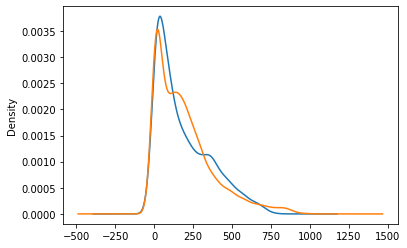

In [28]:
df.groupby("workingday")["count"].plot(kind = "kde")
plt.show()

we can see from the above that workingday with respect to count is not normally distributed and we need to take samples. 

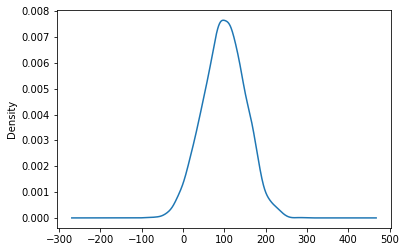

In [29]:
pop1 = pd.Series(np.random.normal(100 , 50 , size = len(sample_1)))
pop1.plot(kind = "kde")
plt.show()                                                                # for sample 1 

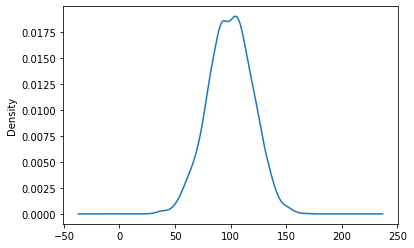

In [30]:
pop1 = pd.Series(np.random.normal(100 , 20, size = len(sample_2)))
pop1.plot(kind = "kde")
plt.show()                                                                # for sample 1 

# Assumptions of 2-sample t-test 

1 . Data values must be independent.

2 . The variances of the two samples will be equal. 

3 . Data in each group must be normally distributed. 


# Null hypothesis , H0 = Variances are not equal

# Alternate hypothesis , Ha = Variances are  equal 

Aplha or significance value = 0.05 

if p-value > significance value (we will failed to reject the null hypothesis)

if p_value < significance value (we will reject the null hypothesis) 



In [31]:
population_mean = df["workingday"].mean()
population_mean

0.6808745177291935

In [32]:
alpha = 0.05

In [33]:
sample_1_mean = sample_1
sample_1_mean = sample_1_mean["count"].mean()
sample_1_mean

193.55833333333334

In [34]:
sample_2_mean = sample_2
sample_2_mean = sample_2_mean["count"].mean()
sample_2_mean

191.24633333333333

In [35]:
std1 = sample_1_mean.std()
std1

0.0

In [36]:
std2 = sample_2_mean.std()
std2

0.0

In [37]:
len(sample_1) , len(sample_2)

(3000, 3000)

In [38]:
root_n = len(sample_1)**0.5
root_n

54.772255750516614

In [39]:
standard_error1 = std1 / root_n
standard_error1

0.0

In [40]:
standard_error2 = std1 / root_n
standard_error2

0.0

In [41]:
stats,p_value = sts.levene(sample_1["count"] , sample_2["count"])
print("Test_Statistics: " , stats)
print("P_Value: " , p_value)
if p_value >= alpha:
    print("P_value is greater than significance value, hence we will failed to reject the null hypothesis")
else:
    print("P_value is lesser than significance value, hence we will reject the null hypothesis")

Test_Statistics:  0.001718732887840926
P_Value:  0.9669324711671101
P_value is greater than significance value, hence we will failed to reject the null hypothesis


The results we got from the above 2-sample t- test that variances are same except null hypothesis. It means the variances of the two samples are equal.

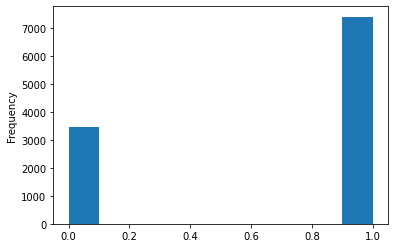

In [42]:
df["workingday"].plot(kind = "hist")
plt.show()

# Observations 

1 . The inferences we got the from above test that Working Day has no effect on the number of electric cycles rented. 

2 . The calculated test statistics value is tcal = 0.3629287874025201

3 . The p_value we got from the test is p_value = 0.5469069180102609 which greateer than significance value(alpha). It means our p_value is lying between the -1.96 to +1.96 region. Hence, we failed to reject it.

# Check if number of cycles rented is similar or diffrent in different weather? 


# Assumptions of Anova test 

1 . It is assume that data is normally distributed.

2 . The ANOVA also assumes homogeneity of variance, which means that the variance among the groups should be approximately equal.

3 . ANOVA also assumes that the observations are independent of each other.

In [43]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour,DayofWeek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


In [44]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

we have only 1 record in the 4th weather, we can drop it as it will not affect our testing.

In [45]:
df.drop(df[df["weather"] == 4].index , axis = 0 , inplace = True)

In [46]:
df["weather"].value_counts()

1    7192
2    2834
3     859
Name: weather, dtype: int64

In [47]:
df.groupby("weather")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


# Let's define Null and Alternative hyposthesis

# Null Hypothesis = H0 = There is no diffrence in the mean

# Alternate Hypothesis = Ha = There is a diffrence in the mean

# Significance Value(Alpha) = 0.05

if p-value > significance value (we will failed to reject the null hypothesis)

if p_value < significance value (we will reject the null hypothesis)

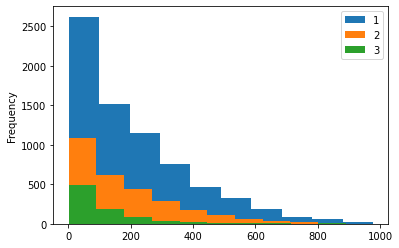

In [48]:
df.groupby("weather")["count"].plot(kind = "hist")
plt.legend()
plt.show()

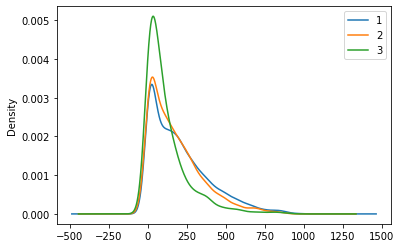

In [49]:
df.groupby("weather")["count"].plot(kind = "kde")
plt.legend()
plt.show()

In [50]:
alpha = 0.05
weather1 = df.loc[df["weather"] == 1]["count"].values
weather2 = df.loc[df["weather"] == 2]["count"].values
weather3 = df.loc[df["weather"] == 3]["count"].values
Stats , p_value = sts.f_oneway(weather1 , weather2 , weather3)
print("Statistical_value: " , Stats)
print("P_value: " , p_value)
if p_value >= alpha:
    print("P_value is greater than significance value, hence we will failed to reject the null hypothesis")
else:
    print("P_value is smaller than significance value, hence we will reject the null hypothesis")
          

Statistical_value:  98.28356881946706
P_value:  4.976448509904196e-43
P_value is smaller than significance value, hence we will reject the null hypothesis


# Observations 

1 . We saw from the above hypothesis that weather situation has impact on bike rentals. 

2 . Since the p-value is very low and very smaller than significance value, hence we will reject the null hypothesis. 

3 . The test_statistical value we get from the test is 98.28356881946706. 

4 . The p_value we got from the test is p_value = 4.976448509904196e-43 which is very smaller than significance value(alpha). It means our p_value does not lie between the -1.96 to +1.96 region. Hence, we will reject it.

# Check if number of cycles rented is similar or diffrent in different season ?

In [51]:
df["season"].value_counts(ascending= True)

1    2685
2    2733
3    2733
4    2734
Name: season, dtype: int64

# Lets define Null and Alternate hypothesis 


# Null Hypothesis = H0 = There is no diffrence in the mean


# Alternate Hypothesis = Ha = There is a diffrence in the mean


# Significance value = 0.05 


if p-value > significance value (we will failed to reject the null hypothesis)

if p_value < significance value (we will reject the null hypothesis)


In [52]:
df.groupby("season")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2685.0,116.325512,125.293931,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


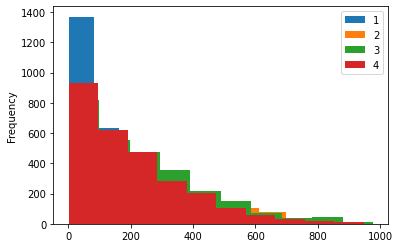

In [53]:
df.groupby("season")["count"].plot(kind = "hist")
plt.legend()
plt.show()

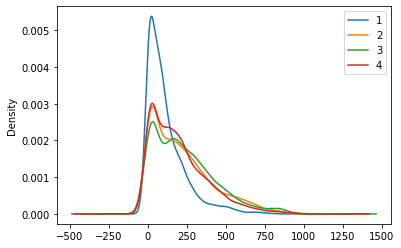

In [54]:
df.groupby("season")["count"].plot(kind = "kde")
plt.legend()
plt.show()

In [55]:
alpha = 0.05
season1 = df.loc[df["season"] == 1]["count"].values
season2 = df.loc[df["season"] == 2]["count"].values
season3 = df.loc[df["season"] == 3]["count"].values
season4 = df.loc[df["season"] == 4]["count"].values
stats,p_value = sts.f_oneway(season1 ,season2 , season3 , season4)
print("Test_Statistics: " , stats)
print("P_value: " , p_value)
if p_value >= alpha:
    print("P_value is greater than significance value, hence we will failed to reject the null hypothesis")
else:
    print("P_value is smaller than significance value, hence we will reject the null hypothesis")

Test_Statistics:  236.94289498936624
P_value:  6.204069471997093e-149
P_value is smaller than significance value, hence we will reject the null hypothesis


# Observations 

1 . It is showed from the above hypothesis that season also has impact on bike rentals.

2 . Since the p-value is very low and very smaller than significance value, hence we will reject the null hypothesis.

3 . The test_statistical value we get from the test is 236.94289498936624. 

4 . The p_value we got from the test is p_value = 6.204069471997093e-149 which is very smaller than significance value(alpha). It means our p_value does not lie between the -1.96 to +1.96 region. Hence, we will reject it.

#  Check if Weather is dependent on the season?

# Assumption of Chi-Squared test


1 . Both variables are categorical.

2 . All observations are independent.

3 . Cells in the contingency table are mutually exclusive.


In [56]:
#df.head()

In [57]:
df.groupby("season")["weather"].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2685.0,1.423464,0.633610,1.0,1.0,1.0,2.0,3.0
2,2733.0,1.422978,0.638858,1.0,1.0,1.0,2.0,3.0
3,2733.0,1.366630,0.614799,1.0,1.0,1.0,2.0,3.0
4,2734.0,1.459766,0.642749,1.0,1.0,1.0,2.0,3.0


In [58]:
df.groupby("weather")["season"].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,2.497080,1.101190,1.0,2.0,3.0,3.0,4.0
2,2834.0,2.530346,1.150498,1.0,1.0,2.0,4.0,4.0
3,859.0,2.509895,1.125393,1.0,2.0,2.0,4.0,4.0


Lets see if weather is dependant on season or not ? 

# Let's define Null and Alternative hypothesis

# Null Hypothesis = H0 = Weather is independent of season

# Alternate Hypothesis = Ha = Weather is dependent on the season

# Significance Value(Alpha) = 0.05¶

if p-value > significance value (we will failed to reject the null hypothesis)

if p_value < significance value (we will reject the null hypothesis)

In [59]:
alpha = 0.05
data = pd.crosstab(df["weather"] , df["season"])
stats , p_value , dof , expected  = sts.chi2_contingency(data)
print("Statistical_value: " , stats)
print("P_value: " , p_value)
print("degrees of freedom: " , dof)
print("Expected values: " , expected)
if p_value >= alpha:
    print("P_value is greater than significance value, hence we will failed to reject the null hypothesis")
else:
    print("P_value is smaller than significance value, hence we will reject the null hypothesis")

Statistical_value:  46.101457310732485
P_value:  2.8260014509929403e-08
degrees of freedom:  6
Expected values:  [[1774.04869086 1805.76352779 1805.76352779 1806.42425356]
 [ 699.06201194  711.55920992  711.55920992  711.81956821]
 [ 211.8892972   215.67726229  215.67726229  215.75617823]]
P_value is smaller than significance value, hence we will reject the null hypothesis


# Observations 

1 . We saw from the above that weather is significanltly dependent on season and it means that there is a strong relationship between weather and seasons in the demand of rented bikes.

2 . Since the p-value is very low and very smaller than significance value, hence we will reject the null hypothesis.

3 . The test_statistical value we get from the test is 46.101457310732485

4 . The p_value we got from the test is p_value = 2.8260014509929403e-08 which is very smaller than significance value(alpha). Consequently, we will reject the null hypothesis because it will lie outside the region. 



# Recommendations

1 .  The demand of GoBikes are less in winter season and more in spring season. The management team should think that demand of yulu bikes depends upon the season in the indian market.

2 . It is observed that demand of bikes more on working days as countless people of india follow "Go green , breath clean" and many of them do not have bikes or cars, so yulu can make a difference here. The team should increase the rate of production of bikes on the working days. 

3 . After performing the certain tests ,the most important conclusion is that weather and season are the deciding factors for the demand of GoBikes because weather and season are closely dependent on each other as demand rates are fluctuating in different weather and seasons. Consequently, we can say that management team should spend the money accordingly with respect to weather and season to avoid the dips in revenues. 

4 . Registered users has the highest number of registeration as campared to the casual users. We can conclude that people frequently first register the bike and then take the ride.

5 . We can say that people perfer to take the bikes in spring season means febraury till march  and clear weather. Hence, the team can make maximum profit in the weather condition by increasing the production. 